In [1]:
#Exibe imagem
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def plot_image(image,title=''):
    fig=plt.figure()
    fig.suptitle(title, fontsize=20)
    plt.imshow(image,cmap=cm.gray)
    plt.axis("off")
    plt.show()

In [2]:
porcent = 50
def define_dimensao(porcent, frame):
    try:
        (height, width, depth) = frame.shape
    except:
        (height, width) = frame.shape
    imgScale = porcent/100
    new_width,new_height = width*imgScale, height*imgScale
    return new_width,new_height

100 284 211 (211, 284)
0.1818283498287201 (88, 63) -0.1555977761745453 (135, 3) cv2.TM_CCOEFF_NORMED 100
0.898578941822052 (88, 0) 0.8414932489395142 (0, 69) cv2.TM_CCORR_NORMED 100
0.7153173089027405 (216, 2) 0.34400591254234314 (95, 70) cv2.TM_SQDIFF_NORMED 100
0.898578941822052 0.8414932489395142 3 100


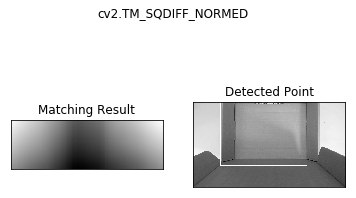

In [60]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img_name="../data/15.png"
template_name="../data/tray_13.png"

img = cv2.imread(img_name,0)
img2 = img.copy()
template = cv2.imread(template_name,0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
#methods = ['cv2.TM_CCOEFF','cv2.TM_CCORR','cv2.TM_SQDIFF']
methods = ['cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF_NORMED']
#methods = ['cv2.TM_SQDIFF_NORMED']
#scales=np.linspace ( 20 ,   110 ,   7 )
scales=[100]
found   =   None
for scale in scales:

    newX, newY = define_dimensao(scale, template)
    new_template = cv2.resize(template, (int(newX), int(newY)))
    w, h = new_template.shape[::-1]
    print(scale,w, h,new_template.shape)
        
    for meth in methods:
        img = img2.copy()
        method = eval(meth)

        # Apply template Matching
        res = cv2.matchTemplate(img,new_template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        
        # if we have found a new maximum correlation value, then update 
        # the bookkeeping variable 
        if   found  is   None   or   max_val   >   found [ 0 ] : 
            found   =   ( max_val ,   max_loc ,min_val ,min_loc ,  res, method, scale) 
        print(max_val ,   max_loc ,min_val ,min_loc , meth, scale)
        
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if found[5] in [cv2.TM_SQDIFF_NORMED]:
      top_left = found[3]#min_loc
    else:
      top_left = found[1]#max_loc
    
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
    print(found[0],found[2] ,found[5],found[6])   
    
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

(28, 19)
[[0.9125943  0.90988225 0.90705186 ... 0.57717055 0.5997426  0.62348276]
 [0.9097473  0.9070879  0.9054767  ... 0.58592933 0.61093146 0.6370164 ]
 [0.9062293  0.9044482  0.90342814 ... 0.597209   0.62429637 0.6513719 ]
 ...
 [0.9201955  0.9190354  0.9181165  ... 0.91399264 0.91403085 0.91404337]
 [0.920196   0.9190841  0.9180084  ... 0.9139341  0.9139851  0.9140113 ]
 [0.9200908  0.9190417  0.91796374 ... 0.91385293 0.9139244  0.9139652 ]] 0.4004600942134857 0.9996170401573181 (446, 69) (164, 71)
(367, 489) (349, 462) (19, 28)
(array([ 69,  69,  69,  70,  70,  70,  70,  70,  71,  71,  71,  71,  71,
        72,  72,  72,  72,  72,  73,  73,  73,  73,  89,  89,  89,  90,
        90,  90,  90,  90,  91,  91,  91,  91,  91,  91,  92,  92,  92,
        92,  93, 109, 109, 109, 110, 110, 110, 110, 110, 111, 111, 111,
       111, 111, 112, 112, 112, 112, 127, 128, 128, 128, 128, 129, 129,
       129, 129, 129, 130, 130, 130, 130, 130, 131, 131, 131, 147, 147,
       147, 148, 148, 148

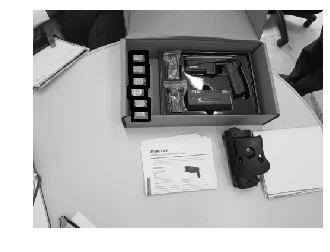

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('../data/kit1.jpg',0)
img_gray=img_rgb
#img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('../data/cartucho.jpg',0)
print(template.shape[::-1])
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(res,min_val, max_val, min_loc, max_loc )
print(img_rgb.shape,res.shape,template.shape)
threshold = 0.95
loc = np.where( res >= threshold)
print(loc)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    
plot_image(img_rgb)

(284, 219)
[[0.78763187 0.7874335  0.7872348  ... 0.80258816 0.80266076 0.80248916]
 [0.7893364  0.7891716  0.78900254 ... 0.80203485 0.80213237 0.8019969 ]
 [0.79008585 0.7899231  0.7897642  ... 0.8008047  0.8009141  0.8008138 ]
 ...
 [0.7945947  0.79433507 0.79414463 ... 0.8177577  0.8179175  0.81808716]
 [0.7957142  0.79549676 0.79535234 ... 0.81895506 0.8191285  0.8193495 ]
 [0.79690826 0.7967327  0.796611   ... 0.81993264 0.8200669  0.8202914 ]] 0.7683664560317993 0.8408337235450745 (39, 22) (107, 1)
(281, 500) (63, 217) (219, 284)
(array([0, 1]), array([107, 107]))


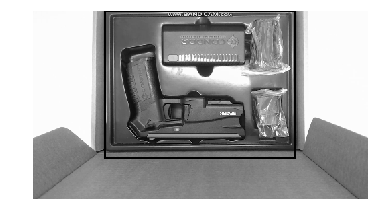

In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('../data/16.png',0)
img_gray=img_rgb
#img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('../data/bandeja.jpg',0)
print(template.shape[::-1])
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(res,min_val, max_val, min_loc, max_loc )
print(img_rgb.shape,res.shape,template.shape)
threshold = 0.84
loc = np.where( res >= threshold)
print(loc)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    
plot_image(img_rgb)

(3, 284, 211)
[[0.77969056 0.7782464  0.7768894  ... 0.50230485 0.50400335 0.5058872 ]
 [0.78213775 0.78074247 0.77938426 ... 0.5068442  0.5084879  0.51032734]
 [0.7842809  0.7829548  0.7816826  ... 0.51122296 0.51278746 0.514548  ]
 ...
 [0.9254887  0.926301   0.9270088  ... 0.8956701  0.89533377 0.8950117 ]
 [0.92506146 0.92588454 0.9265933  ... 0.89767176 0.89733547 0.89702827]
 [0.9247974  0.9256184  0.926311   ... 0.899411   0.8990973  0.8988292 ]] 0.45309120416641235 0.9448825716972351 (179, 0) (27, 149)


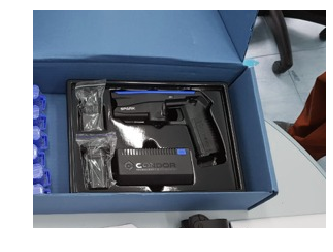

In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('../data/kit1.jpg')
img_gray=img_rgb
#img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('../data/tray_13.png')
print(template.shape[::-1])
_,w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_SQDIFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(res,min_val, max_val, min_loc, max_loc )
if(max_val>0.8):
    pt=min_loc
    img=img_rgb[pt[1]:pt[1] + h,pt[0]:pt[0] + w]
    plot_image(img)